<a href="https://colab.research.google.com/github/janinerottmann/Practical-Data-Science/blob/master/5.2%20Building%20yor%20own%20App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 19/20*
# Programming Assignment 5 - Building your own App

In this programming assignment you'll build a model that could serve as a foundation for your own app. To this end, you will create your own dataset and build a deep learning model on this data.

__Google Drive integration__

If you want to store and access your downloaded data for this assignment you can use the following code:

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/My\ Drive/pds_a5
%cd /content/drive/My\ Drive/pds_a5

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/pds_a5’: File exists
/content/drive/My Drive/pds_a5


## Develope an Application Idea

Since I wasn't satisfied with the performance of my first model I decided to give it another try but this time with better training data.
I used more keywords and excluded all images that didn't fit my idea of a proper indoor, running or trailrunning shoe. Afterwards I trained the model as I did before.

## Creating your own Dataset

Now you need to construct a dataset that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

First, you'll need to create a file that stores all the URLs to download the images. You can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   You **don't** need to scrape Google - you just need somehow create a list of URLs to download pictures

In [0]:
url_indoorShoes = 'https://raw.githubusercontent.com/pds1920/a5-janinerottmann/new_assignment_05/new%20indoor%20shoes.csv?token=AL77EZKFH2GVU42ISTBYCEC575YTS'
url_runningShoes = 'https://raw.githubusercontent.com/pds1920/a5-janinerottmann/new_assignment_05/new%20running%20shoes.csv?token=AL77EZJNFGIAPRHTR6BHGW2575YYM'
url_trailrunningShoes = 'https://raw.githubusercontent.com/pds1920/a5-janinerottmann/new_assignment_05/new%20trail%20running%20shoes.csv?token=AL77EZMEGWXEIQLB2FCZ2LC575YZ2'

## Create folders and download images



In [0]:
from fastai.vision import *

#### 1. Dowload the data 
  - Use `download_data` to download the .csv files from github using the links above
  - Provide the parameters `fname='your_file.csv` and `ext=''`

In [0]:
download_data(url= url_indoorShoes, fname='new_indoor_shoes.csv', ext='')

PosixPath('new_indoor_shoes.csv')

In [0]:
download_data(url= url_runningShoes, fname='new_running_shoes.csv', ext='')

PosixPath('new_running_shoes.csv')

In [0]:
download_data(url= url_trailrunningShoes, fname='new_trailrunning_shoes.csv', ext='')

PosixPath('new_trailrunning_shoes.csv')

#### 2. Create folders
  - Use `Path()` to create a destation path
  - `mkdir(parents=True, exist_ok=True)` creates directories

In [0]:
#create folder
folder = 'indoor_shoes'
file = 'new_indoor_shoes.csv'

#create destination path
path = Path('data/sportShoes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

#download images in destination path
download_images(path/file, dest)

In [0]:
folder = 'running_shoes'
file = 'new_running_shoes.csv'

path = Path('data/sportShoes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest)

Error https://www.rei.com/media/f0b02aa7-e02f-4de6-9acf-f59a16ed2e58?size=784x588 HTTPSConnectionPool(host='www.rei.com', port=443): Read timed out. (read timeout=4)
Error https://www.maketheroadnevada.com/images/shoes/new%20balance%20running%20shoes-999txo.jpg HTTPSConnectionPool(host='www.maketheroadnevada.com', port=443): Max retries exceeded with url: /images/shoes/new%20balance%20running%20shoes-999txo.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f941267cf98>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://cdn.shortpixel.ai/client/q_lossless,ret_img,w_1024/https://ecothes.com/wp-content/uploads/2019/12/Newton-Running-sustainable-running-shoes-1024x1024.jpg HTTPSConnectionPool(host='ecothes.com', port=443): Max retries exceeded with url: /wp-content/uploads/2019/12/Newton-Running-sustainable-running-shoes-1024x1024.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certif

In [0]:
folder = 'trail_running_shoes'
file = 'new_trailrunning_shoes.csv'

path = Path('data/sportShoes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest)

Error http://www.bordeaux-ink.de/images/bordeauxinkde/864-trail-running-shoes-at-7937.jpg HTTPConnectionPool(host='www.bordeaux-ink.de', port=80): Max retries exceeded with url: /images/bordeauxinkde/864-trail-running-shoes-at-7937.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f941195f5c0>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://resources.mandmdirect.com/Images/_default/n/b/1/nb1511_5_cloudzoom.jpg HTTPSConnectionPool(host='resources.mandmdirect.com', port=443): Read timed out. (read timeout=4)
Error https://www.rei.com/media/c0e5eefc-6b5d-4c1f-b058-bf97fa1c94f6?size=784x588 HTTPSConnectionPool(host='www.rei.com', port=443): Read timed out. (read timeout=4)
Error https://resources.mandmdirect.com/Images/_default/n/b/1/nb1502_1_cloudzoom.jpg HTTPSConnectionPool(host='resources.mandmdirect.com', port=443): Read timed out. (read timeout=4)
Error https://www.rei.com/media/1ece66fd-a657-4251-88d0-6949

#### 3. Download images 
- Use `download_images` to download the data into the corresponding directories

In [0]:
#already did that before in order not to overwrite file and folder name

#### 4. Verify Images
- Use a list comprehension to solve this task

In [0]:
#create classes
classes = ['indoor_shoes', 'running_shoes', 'trail_running_shoes']

In [0]:
#alternatively using a list comprehension
images_ver = [verify_images(path/c, delete=True, max_size=500) for c in classes]
print(images_ver)

cannot identify image file <_io.BufferedReader name='data/sportShoes/indoor_shoes/00000007.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/indoor_shoes/00000008.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/indoor_shoes/00000015.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/indoor_shoes/00000018.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/indoor_shoes/00000021.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/indoor_shoes/00000041.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/indoor_shoes/00000049.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/indoor_shoes/00000083.jpg'>


cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000028.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000033.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000043.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000077.gif'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000096.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000107.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000152.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000181.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000242.png'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000281.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000336.png'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000331.png'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000338.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000349.svg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000343.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000353.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/running_shoes/00000373.jpg'>


cannot identify image file <_io.BufferedReader name='data/sportShoes/trail_running_shoes/00000175.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/trail_running_shoes/00000185.png'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/trail_running_shoes/00000196.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/trail_running_shoes/00000216.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/trail_running_shoes/00000236.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/trail_running_shoes/00000263.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/trail_running_shoes/00000306.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/trail_running_shoes/00000308.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportShoes/trail_running_shoes/00000324.jpg'>
cannot identify image file <_io.BufferedReader name='data/sportS

#### 5. Create a DataBunch

In [0]:
np.random.seed(1)
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=224).normalize(imagenet_stats)

#### 6. Take a look at some of your pictures. 
Does everything look as expected?

In [0]:
data.classes

['indoor_shoes', 'running_shoes', 'trail_running_shoes']

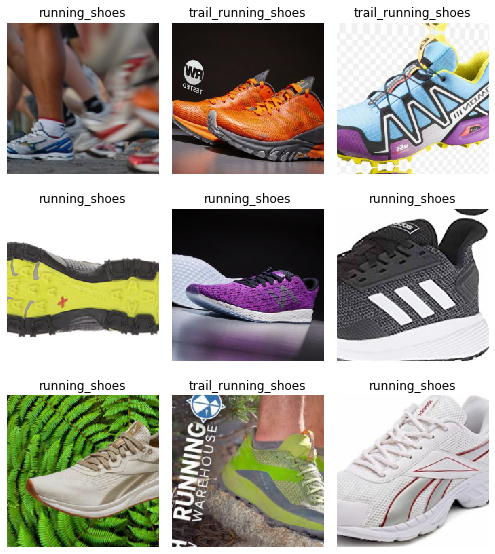

In [0]:
data.show_batch(rows=3, figsize=(7,8))

## Modeling

### Create a learner

Create an appropriate learner for your data
- Choose an appropriate architecture
- Choose appropriate [metrics](https://docs.fast.ai/metrics.html) for your task

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 35.2MB/s]


### Find the learning rate



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 5.75E-03


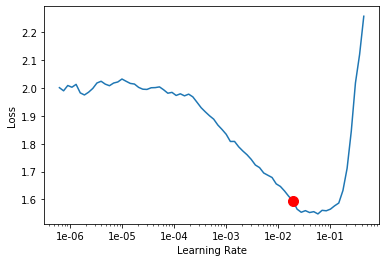

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

### Fit the model

Use your knowdledge on model training!

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1.91e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.736814,1.920750,0.576923,00:10
1,1.406611,1.793201,0.583333,00:10
2,1.207415,1.331798,0.685897,00:10
3,1.033591,1.229963,0.647436,00:10
4,0.899305,1.167064,0.647436,00:10


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 5.75E-05


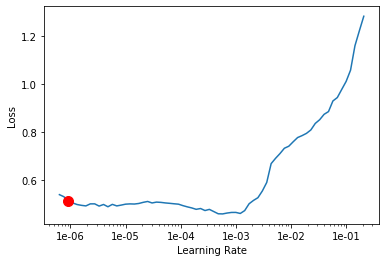

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1.91e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.506213,1.171351,0.698718,00:10
1,0.521400,1.347117,0.673077,00:10
2,0.485079,1.813461,0.641026,00:10
3,0.494626,1.585176,0.621795,00:10
4,0.446673,1.875738,0.641026,00:10
5,0.398164,1.334980,0.685897,00:10
6,0.350662,1.253429,0.737179,00:11
7,0.309973,1.128644,0.769231,00:10
8,0.280827,1.122109,0.775641,00:10
9,0.242023,1.105417,0.762821,00:10


### Evaluate the model

You' ve already seen many ways to evaluate a model. Evaluate your model in a qualitative and quantitative manner.

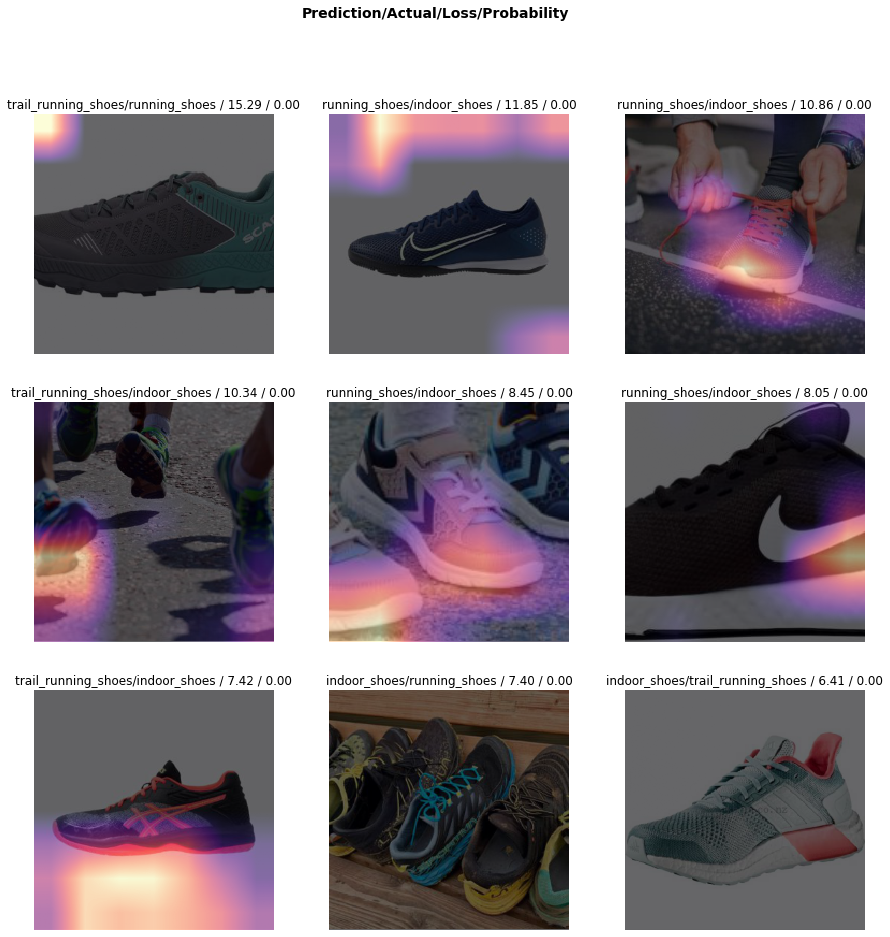

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, heatmap=True, figsize=(15,15))

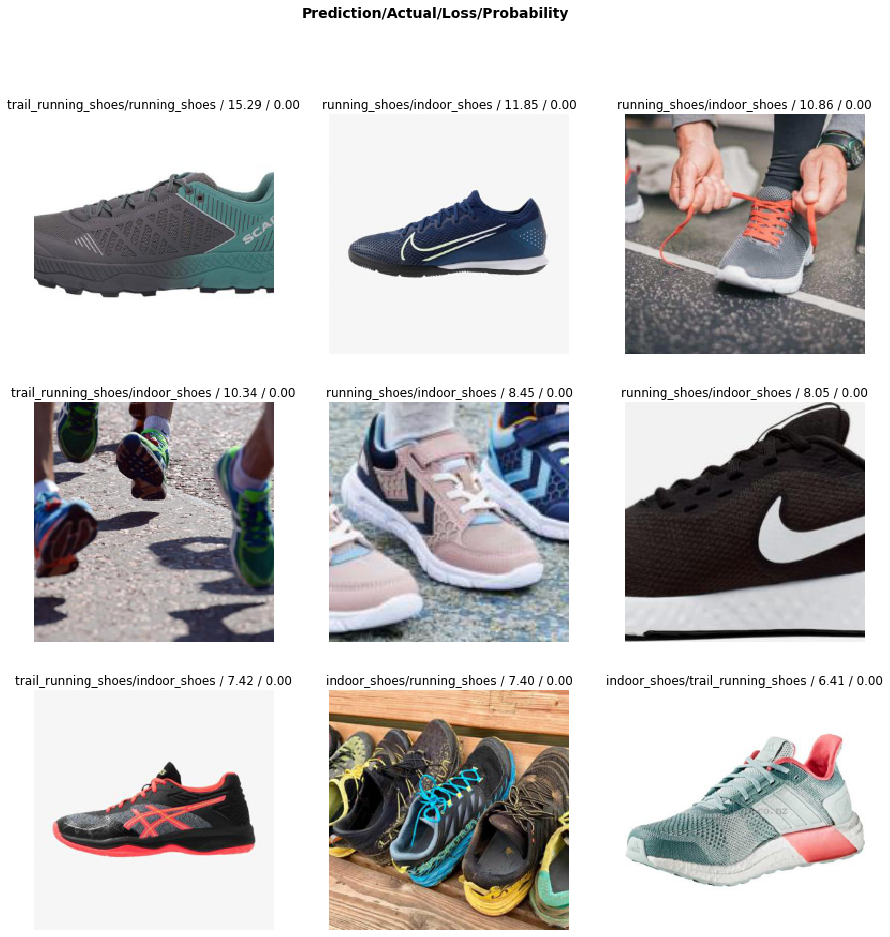

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9, figsize=(15,15))

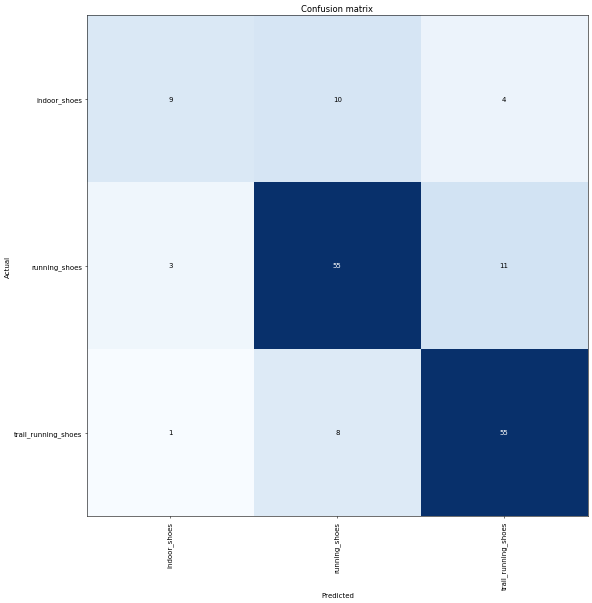

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=50)

## Discussion

Selecting the right training data seams to be very important when doing image classification.

- Redoing the training data resulted in a higher accuracy.
- The heatmap shows that the images have been classified by the sole or at least the shoe most of the time.
- Regarding the top losses I think the model learned that indoor shoes should have white or brown soles and that trailrunning shoes are supposed to have a higher shoe sole and spikes.